In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [17]:
df = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(6).T

,0,1,2,3,4,5
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC
gender,Female,Male,Male,Male,Female,Female
SeniorCitizen,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No
Dependents,No,No,No,No,No,No
tenure,1,34,2,45,2,8
PhoneService,No,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No


In [18]:
# Fazendo uma cópia do dataframe
df_raw = df.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [20]:
brancos = df[df['TotalCharges']==' '].index
df.iloc[brancos]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
# Corrigindo a coluna TotalCharges
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '-1').astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [23]:
# Transformando dados categóricos em numéricos
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int8
dtypes: float64(2), int16(1), int64(2), int8(16)
memory usage: 34

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
# Divisão do dataframe
# Importando as funções
from sklearn.model_selection import train_test_split

# Separando os dados em treino e teste
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
# Separando em treino e validação
train, valid = train_test_split(train, test_size=0.2, random_state=42)

In [28]:
train.shape, valid.shape, test.shape

((4507, 21), (1127, 21), (1409, 21))

In [29]:
feats = [c for c in df.columns if c not in ['customerID', 'Churn']]

In [30]:
# Treinando o modelo
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=4, random_state=42, n_jobs=-1)

In [31]:
rf.fit(train[feats], train['Churn'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [32]:
preds = rf.predict(valid[feats])

In [35]:
# avaliando o desempenho do modelo
from sklearn.metrics import accuracy_score
accuracy_score(valid['Churn'], preds)

0.7808340727595386

In [36]:
valid['Churn'].value_counts()

0    822
1    305
Name: Churn, dtype: int64

In [39]:
# Verificando o Dataframe completo
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [40]:
(valid['Churn']==0).mean()

0.7293700088731144

In [41]:
# Rodando o modelo para prever o churn nos dados de teste
accuracy_score(test['Churn'], rf.predict(test[feats]))

0.794889992902768

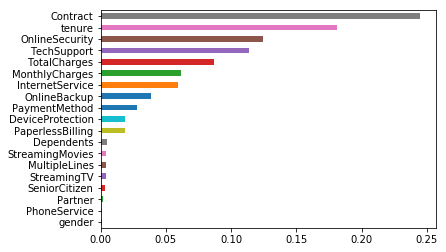

In [44]:
# Analisando a importância das caracteristicas 
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

In [49]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(valid['Churn'], preds))

,0,1
0,753,69
1,178,127


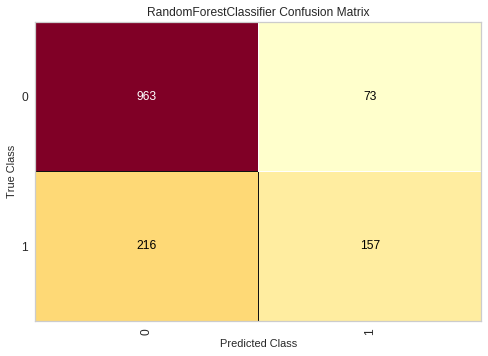

In [52]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(train[feats], train['Churn'])
cm.score(test[feats], test['Churn'])
cm.poof()